In [11]:
from datetime import datetime
now = datetime.now()
print(now)

2021-01-15 19:25:53.019661


In [12]:
print("Name : Ramesh Bhutka")
print("Sap ID:- 53004190003")

Name : Ramesh Bhutka
Sap ID:- 53004190003


## Simple linear regression

Auto Insurance in Sweden

In the following data

X = number of claims

Y = total payment for all the claims in thousands of Swedish Kronor

for geographical zones in Sweden


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/Ramesh-Bhutka/simple-linear-regression/main/Swedish-Insurance.csv")

In [15]:
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [16]:
df.isnull().any()

X    False
Y    False
dtype: bool

In [17]:
df.shape

(63, 2)

In [18]:
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


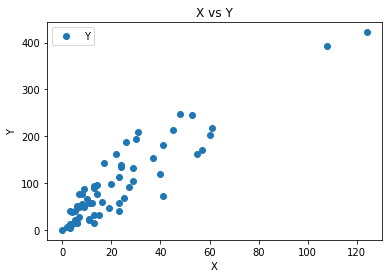

In [19]:
df.plot(x='X', y='Y', style='o')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [20]:
df.corr()

,X,Y
X,1.000000,0.912878
Y,0.912878,1.000000


In [21]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
X_train.shape

(50, 1)

In [24]:
X_test.shape

(13, 1)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
print(regressor.intercept_)

19.285103078189863


In [27]:
print(regressor.coef_)

[3.34637674]


In [28]:
y_pred = regressor.predict(X_test)

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,152.8,143.101043
1,39.9,29.324233
2,187.5,106.290898
3,93.0,62.788001
4,14.6,39.363364
5,161.5,92.905391
6,38.1,32.670610
7,21.3,56.095247
8,248.1,179.911187
9,15.7,62.788001


In [30]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 35.7332041222085
Mean Squared Error: 1813.5036286855975
Root Mean Squared Error: 42.58525130471344
R Squared Error          :  0.6709172184615007


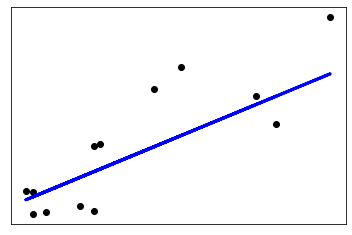

In [31]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()